# Audio Classification

In this project we will create a model to classify the audios, the dataset that we will be using for this project is taken from https://urbansounddataset.weebly.com/urbansound8k.html. This dataset contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes: air_conditioner, car_horn, children_playing, dog_bark, drilling, enginge_idling, gun_shot, jackhammer, siren, and street_music. Firstly, we will perform Exploratory Data Analysis on the data inorder to understand the various characteritics, then we will perform Data Preprocessing to convert the data which can be used to develop a model which can classify the audios and finally we will create the model based on the requirements and evaluate its performance.

## Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
from scipy.io import wavfile as wav
import IPython.display as ipd
import librosa
import librosa.display
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

## Exploratory Data Analysis

### Visualizing data sample graphically

### Observing by using scipy

In [2]:
# file name to be visualized

filename_drill = 'drilling_sound.wav'

wave_sample_rate_drill, wave_audio_drill = wav.read(filename_drill)

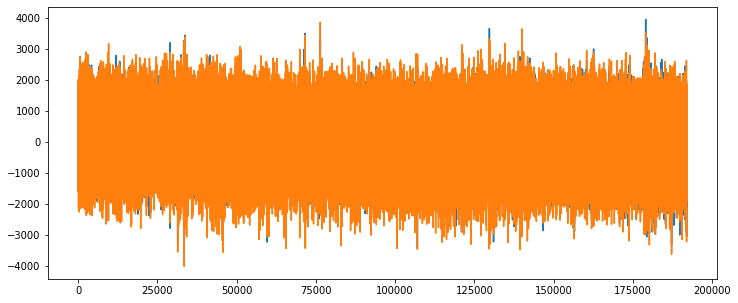

In [3]:
# plotting a waveplot

plt.figure(figsize = (12, 5))

# getting data and sample rate by audio file
plt.plot(wave_audio_drill)

In [4]:
# observing the value of data and sample rate by scipy

print('Sample rate for drlling sample audio: {}'.format(wave_sample_rate_drill))
print('Data for drlling sample audio: {}'.format(wave_audio_drill))

Sample rate for drlling sample audio: 48000
Data for drlling sample audio: [[-546 -621]
 [ 855  801]
 [ 865 1222]
 ...
 [1282 1321]
 [ 884  628]
 [ -12  132]]


### Observing by using librosa

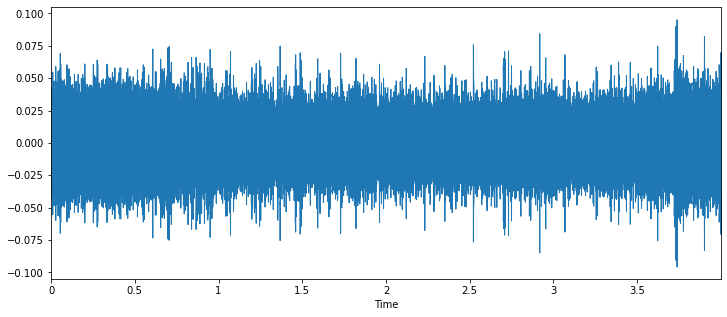

In [5]:
# sample 1
# file name to be visualized

filename_drill = 'drilling_sound.wav'

# plotting a waveplot

plt.figure(figsize = (12, 5))

# getting data and sample rate by audio file 
data_drill, sample_rate_drill = librosa.load(filename_drill)
librosa.display.waveplot(data_drill, sr = sample_rate_drill)
ipd.Audio(filename_drill)

In [6]:
# observing the value of data and sample rate by librosa

print('Sample rate for drlling sample audio: {}'.format(sample_rate_drill))
print('Data for drlling sample audio: {}'.format(data_drill))

Sample rate for drlling sample audio: 22050
Data for drlling sample audio: [ 0.00149125  0.01954265 -0.01523496 ... -0.01151652  0.00215869
  0.02661084]


We can clearly see that from 'scipy' we are grtting dual channel output for the audio and the sample rate is 48 KHz while by librosa we are getting a single channel output and the sample rate is 22.05 KHz. Thus librosa converts all the audio files to a same sample rate and converts the audio to mono channel and normalises the values in the audio file.

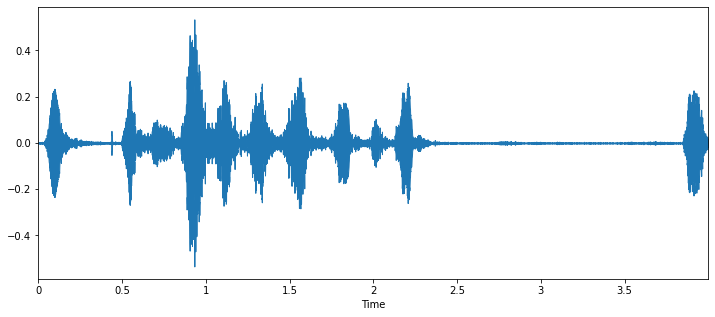

In [7]:
# sample 2
# file name to be visualized

filename_dog = 'dog_barking.wav'

# plotting a waveplot

plt.figure(figsize = (12, 5))

# getting data and sample rate by audio file 
data_dog, sample_rate_dog = librosa.load(filename_dog)
librosa.display.waveplot(data_dog, sr = sample_rate_dog)
ipd.Audio(filename_dog)

In [8]:
# getting the value of sample rate
# Sample rate: Itis defined as the number of times per second a sound is sampled. 

print('Sample rate for barking sample audio: {}'.format(sample_rate_dog))

Sample rate for barking sample audio: 22050


In [9]:
# getting the value of data

print('Data for barking sample audio: {}'.format(data_dog))

Data for barking sample audio: [-0.00098422 -0.00199717 -0.0006484  ...  0.01190471  0.01114525
  0.00986207]


### Loading the metadata file

In [10]:
# this file consists of data regarding the audio files that we have in the dataset

data = pd.read_csv(r'UrbanSound8K\metadata\UrbanSound8K.csv')

In [11]:
# visualizing the metadata

data.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [12]:
# to check what is the number of audio files per category

data['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

## Feature Preprocessing

Here we will be using Mel-Frequency Cepstral Coefficient(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. The audio representations will allow us to identify features for classification.

In [13]:
# using sample 2 for mfcc

librosa_audio_data, librosa_sample_rate = librosa.load(filename_dog)
mfcc = librosa.feature.mfcc(y = librosa_audio_data, sr = librosa_sample_rate, n_mfcc = 40)

# observing the array that we got by using mfcc on a audio sample
print(mfcc)
# size of the array
print(mfcc.shape)

[[-478.15152    -385.5327     -264.81607    ... -285.74292
  -313.10583    -349.44144   ]
 [  57.63046     109.99824     120.98422    ...  152.17941
   171.2911      161.11595   ]
 [   9.495522    -16.335783    -88.06862    ...  -44.035133
   -25.94432     -12.719859  ]
 ...
 [   0.75278574   -0.7186484     1.8830779  ...    3.3986797
     0.6307417     1.5321834 ]
 [   5.184283     -5.9309487    -7.6658435  ...   -5.220813
    -2.2231305    -1.2889624 ]
 [  -2.5029202   -11.527849     -4.075242   ...    1.7974552
     4.142783      2.3901563 ]]
(40, 173)


In [14]:
# audio file path

audio_dataset_path = 'UrbanSound8K/audio/'

In [15]:
# creating a function to perform mfcc for the audio file

def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfcc = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
    mfcc_scaled_features = np.mean(mfcc.T, axis = 0)
    
    return mfcc_scaled_features

In [16]:
# performing mfcc for all the audio files

extracted_features = []

for index_num, row in tqdm(data.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/'+str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

3554it [05:07, 11.62it/s]c:\users\prank\appdata\local\programs\python\python37\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8326it [11:21, 19.83it/s]c:\users\prank\appdata\local\programs\python\python37\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
c:\users\prank\appdata\local\programs\python\python37\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [11:50, 12.30it/s]


In [17]:
# observing extracted features

extracted_features

[[array([-2.1579301e+02,  7.1666122e+01, -1.3181377e+02, -5.2091328e+01,
         -2.2115967e+01, -2.1764179e+01, -1.1183746e+01,  1.8912683e+01,
          6.7266383e+00,  1.4556894e+01, -1.1782045e+01,  2.3010368e+00,
         -1.7251303e+01,  1.0052423e+01, -6.0094995e+00, -1.3153188e+00,
         -1.7693510e+01,  1.1171225e+00, -4.3699460e+00,  7.2629538e+00,
         -1.1815969e+01, -7.4952617e+00,  5.4577127e+00, -2.9442446e+00,
         -5.8693881e+00, -9.8653689e-02, -3.2121704e+00,  4.6092515e+00,
         -5.8293266e+00, -5.3475080e+00,  1.3341198e+00,  7.1307821e+00,
         -7.9449996e-02,  1.7109245e+00, -5.6941996e+00, -2.9041710e+00,
          3.0366950e+00, -1.6827590e+00, -8.8585860e-01,  3.5438877e-01],
        dtype=float32),
  'dog_bark'],
 [array([-4.2468677e+02,  1.1056227e+02, -5.4148235e+01,  6.2010738e+01,
         -7.0951575e-01,  1.8157396e+01,  1.4451563e+00,  1.1161132e+01,
         -1.7058899e+00,  1.2360451e+01, -1.1055476e+01,  2.0736568e+01,
         -8

In [18]:
# converted the extracted features into a dataframe

extracted_features_df = pd.DataFrame(extracted_features, columns = ['features', 'class'])
extracted_features_df.head()

features             class
0  [-215.79301, 71.66612, -131.81377, -52.091328,...          dog_bark
1  [-424.68677, 110.56227, -54.148235, 62.01074, ...  children_playing
2  [-459.56467, 122.800354, -47.92471, 53.265694,...  children_playing
3  [-414.55377, 102.896904, -36.66495, 54.18041, ...  children_playing
4  [-447.397, 115.0954, -53.809113, 61.608585, 1....  children_playing

In [19]:
# splitting the dataset into dependent and independent features

x = np.array(extracted_features_df['features'].tolist())
y = np.array(extracted_features_df['class'].tolist())
print(x,' ',y)

[[-2.15793015e+02  7.16661224e+01 -1.31813766e+02 ... -1.68275905e+00
  -8.85858595e-01  3.54388773e-01]
 [-4.24686768e+02  1.10562271e+02 -5.41482353e+01 ...  6.17408693e-01
  -6.84974134e-01  5.71514487e-01]
 [-4.59564667e+02  1.22800354e+02 -4.79247093e+01 ...  2.22541404e+00
   1.54661798e+00 -8.36315691e-01]
 ...
 [-3.04613159e+02  1.12619904e+02 -4.71619453e+01 ... -3.03358102e+00
   2.71057296e+00  7.67189503e+00]
 [-3.44714233e+02  1.26758133e+02 -5.61771698e+01 ... -7.80225849e+00
  -1.77907372e+00  5.83541918e+00]
 [-3.15933838e+02  9.56758881e+01 -3.80477676e+01 ...  5.77580392e-01
  -1.14637651e+01 -5.96535444e+00]]   ['dog_bark' 'children_playing' 'children_playing' ... 'car_horn'
 'car_horn' 'car_horn']


In [20]:
# shape of dependent and independent dataset

print(x.shape,' ',y.shape)

(8732, 40)   (8732,)


In [21]:
# Label encoding for the dependent dataset

labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

## Train Test Split

In [22]:
# splitting the dataset into train and test data 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [23]:
# shape of train and test dataset

print(x_train.shape,' ',y_train.shape)
print(x_test.shape,' ',y_test.shape)

(6985, 40)   (6985, 10)
(1747, 40)   (1747, 10)


## Creation of Model  

In [24]:
# creating the model

model = Sequential()

# first layer
model.add(Dense(100, input_shape = (40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
          
# final layer
model.add(Dense(y.shape[1]))
model.add(Activation('softmax'))

In [25]:
# visualing model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

In [26]:
# compiling the model

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [27]:
# fitting the model for 200 epochs and batch size 64

model.fit(x_train, y_train, batch_size = 64, epochs = 200, validation_data = (x_test, y_test))

Epoch 1/200
110/110 [==============================] - 2s 4ms/step - loss: 18.1479 - accuracy: 0.1681 - val_loss: 1.9297 - val_accuracy: 0.3480
Epoch 2/200
110/110 [==============================] - 0s 2ms/step - loss: 3.9564 - accuracy: 0.2301 - val_loss: 2.0027 - val_accuracy: 0.2788
Epoch 3/200
110/110 [==============================] - 0s 2ms/step - loss: 2.5543 - accuracy: 0.2395 - val_loss: 2.0132 - val_accuracy: 0.2959
Epoch 4/200
110/110 [==============================] - 0s 2ms/step - loss: 2.2364 - accuracy: 0.2712 - val_loss: 1.9872 - val_accuracy: 0.3274
Epoch 5/200
110/110 [==============================] - 0s 2ms/step - loss: 2.0657 - accuracy: 0.2995 - val_loss: 1.8959 - val_accuracy: 0.3623
Epoch 6/200
110/110 [==============================] - 0s 2ms/step - loss: 1.9709 - accuracy: 0.3195 - val_loss: 1.8135 - val_accuracy: 0.4144
Epoch 7/200
110/110 [==============================] - 0s 2ms/step - loss: 1.8710 - accuracy: 0.3515 - val_loss: 1.7386 - val_accuracy: 0.432

Epoch 58/200
110/110 [==============================] - 0s 2ms/step - loss: 0.9379 - accuracy: 0.6896 - val_loss: 0.7783 - val_accuracy: 0.7739
Epoch 59/200
110/110 [==============================] - 0s 2ms/step - loss: 0.9331 - accuracy: 0.6809 - val_loss: 0.7547 - val_accuracy: 0.7768
Epoch 60/200
110/110 [==============================] - 0s 2ms/step - loss: 0.9268 - accuracy: 0.6853 - val_loss: 0.7594 - val_accuracy: 0.7716
Epoch 61/200
110/110 [==============================] - 0s 2ms/step - loss: 0.9023 - accuracy: 0.6918 - val_loss: 0.7501 - val_accuracy: 0.7745
Epoch 62/200
110/110 [==============================] - 0s 2ms/step - loss: 0.9067 - accuracy: 0.6941 - val_loss: 0.7654 - val_accuracy: 0.7676
Epoch 63/200
110/110 [==============================] - 0s 2ms/step - loss: 0.8946 - accuracy: 0.6976 - val_loss: 0.7505 - val_accuracy: 0.7676
Epoch 64/200
110/110 [==============================] - 0s 2ms/step - loss: 0.8952 - accuracy: 0.6995 - val_loss: 0.7487 - val_accuracy:

Epoch 115/200
110/110 [==============================] - 0s 2ms/step - loss: 0.7841 - accuracy: 0.7313 - val_loss: 0.6326 - val_accuracy: 0.8019
Epoch 116/200
110/110 [==============================] - 0s 2ms/step - loss: 0.7944 - accuracy: 0.7296 - val_loss: 0.6442 - val_accuracy: 0.8014
Epoch 117/200
110/110 [==============================] - 0s 2ms/step - loss: 0.7800 - accuracy: 0.7376 - val_loss: 0.6396 - val_accuracy: 0.7974
Epoch 118/200
110/110 [==============================] - 0s 2ms/step - loss: 0.7598 - accuracy: 0.7417 - val_loss: 0.6253 - val_accuracy: 0.8128
Epoch 119/200
110/110 [==============================] - 0s 2ms/step - loss: 0.7911 - accuracy: 0.7314 - val_loss: 0.6269 - val_accuracy: 0.8128
Epoch 120/200
110/110 [==============================] - 0s 2ms/step - loss: 0.7733 - accuracy: 0.7323 - val_loss: 0.6257 - val_accuracy: 0.8145
Epoch 121/200
110/110 [==============================] - 0s 2ms/step - loss: 0.7760 - accuracy: 0.7376 - val_loss: 0.6150 - val_ac

110/110 [==============================] - 0s 2ms/step - loss: 0.7357 - accuracy: 0.7449 - val_loss: 0.5980 - val_accuracy: 0.8077
Epoch 172/200
110/110 [==============================] - 0s 2ms/step - loss: 0.7395 - accuracy: 0.7419 - val_loss: 0.5939 - val_accuracy: 0.8128
Epoch 173/200
110/110 [==============================] - 0s 2ms/step - loss: 0.7190 - accuracy: 0.7490 - val_loss: 0.5842 - val_accuracy: 0.8203
Epoch 174/200
110/110 [==============================] - 0s 2ms/step - loss: 0.7294 - accuracy: 0.7519 - val_loss: 0.6000 - val_accuracy: 0.8117
Epoch 175/200
110/110 [==============================] - 0s 2ms/step - loss: 0.7465 - accuracy: 0.7486 - val_loss: 0.5925 - val_accuracy: 0.8157
Epoch 176/200
110/110 [==============================] - 0s 2ms/step - loss: 0.7451 - accuracy: 0.7427 - val_loss: 0.5862 - val_accuracy: 0.8191
Epoch 177/200
110/110 [==============================] - 0s 2ms/step - loss: 0.7156 - accuracy: 0.7532 - val_loss: 0.5738 - val_accuracy: 0.8197

In [28]:
# calculating the model accuracy

test_accuracy = model.evaluate(x_test, y_test, verbose = 0)
print(test_accuracy[1])

0.8242701888084412


## Testing the model for new audio samples

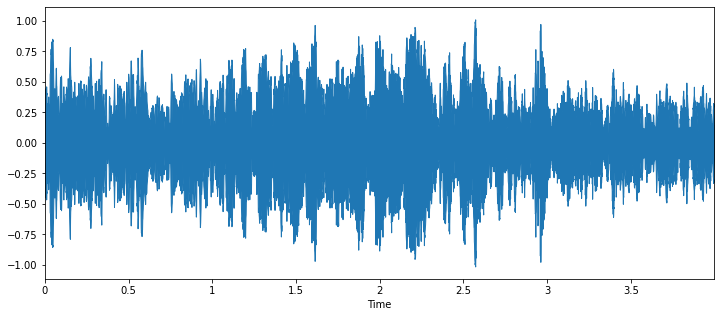

In [29]:
# testing the model for test sample 1

s_filename = 'siren.wav'

# plotting a waveplot

plt.figure(figsize = (12, 5))

# getting data and sample rate by audio file 
s_data, s_sample_rate = librosa.load(s_filename)
librosa.display.waveplot(s_data, sr = s_sample_rate)
ipd.Audio(s_filename)

In [30]:
# making predictions for test sample 1

prediction = features_extractor(s_filename)
prediction = prediction.reshape(1,-1)
model.predict(prediction)

array([[3.2843355e-09, 3.5989890e-04, 8.5744465e-04, 2.1749198e-02,
        3.9463374e-03, 2.9823166e-05, 4.3576973e-04, 1.3326796e-07,
        9.7016913e-01, 2.4523027e-03]], dtype=float32)

In [31]:
# getting the class with highest probability for test sample 1

prediction_class = labelencoder.inverse_transform(np.argmax(model.predict(prediction), axis=-1))

In [32]:
# checking the result

prediction_class

array(['siren'], dtype='<U16')

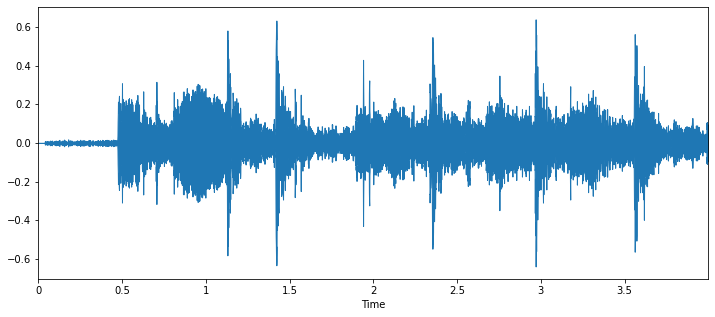

In [33]:
# testing the model for test sample 2

sm_filename = 'street_music.wav'

# plotting a waveplot

plt.figure(figsize = (12, 5))

# getting data and sample rate by audio file 
sm_data, sm_sample_rate = librosa.load(sm_filename)
librosa.display.waveplot(sm_data, sr = sm_sample_rate)
ipd.Audio(sm_filename)

In [34]:
# making predictions for test sample 2

prediction = features_extractor(sm_filename)
prediction = prediction.reshape(1,-1)
model.predict(prediction)

array([[2.8186638e-04, 1.5287077e-03, 3.0183241e-02, 7.5546470e-03,
        7.7074409e-02, 3.2285289e-03, 1.6009934e-04, 1.9319175e-02,
        1.6997429e-03, 8.5896951e-01]], dtype=float32)

In [35]:
# getting the class with highest probability for test sample 2

prediction_class = labelencoder.inverse_transform(np.argmax(model.predict(prediction), axis=-1))

In [36]:
# checking the result

prediction_class

array(['street_music'], dtype='<U16')

As we can see that our model is giving accuracy of 84.2 % which is good, for the test sample 1 and 2 it was clearly able to classify the audio. Further we can improve our model by hyperparameter tuning so we can get higher accuracies.